<a href="https://www.kaggle.com/code/saatvikrajgupta/notebookb45c812f81?scriptVersionId=134265444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/mushroom-dataset/MushroomDataset/primary_data_meta.txt
/kaggle/input/mushroom-dataset/MushroomDataset/secondary_data_meta.txt
/kaggle/input/mushroom-dataset/MushroomDataset/primary_data.csv
/kaggle/input/mushroom-dataset/MushroomDataset/secondary_data.csv


# Importing Datset

In [2]:
df = pd.read_csv("/kaggle/input/mushroom-dataset/MushroomDataset/secondary_data.csv", sep = ";")

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
print(df.shape)

(61069, 21)


In [5]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


# EDA and Pre-Processing

In [6]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [7]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [8]:
df = df.drop_duplicates()
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [9]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

In [10]:
df.isnull().mean()*100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.176797
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.176157
gill-spacing            41.137173
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.592026
stem-surface            62.574069
stem-color               0.000000
veil-type               94.785221
veil-color              87.832182
has-ring                 0.000000
ring-type                4.055939
spore-print-color       89.616401
habitat                  0.000000
season                   0.000000
dtype: float64

In [11]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [12]:
columns_to_drop = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']  
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


In [14]:
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object

In [15]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for column in columns:
    encoded_values = le.fit_transform(df[column])
    df[column] = encoded_values

df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,17.09,11,1,2,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,18.19,11,1,2,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,17.74,11,1,2,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,15.98,11,1,5,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,17.20,11,1,5,0,3


In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
correlation_matrix = df.corr()

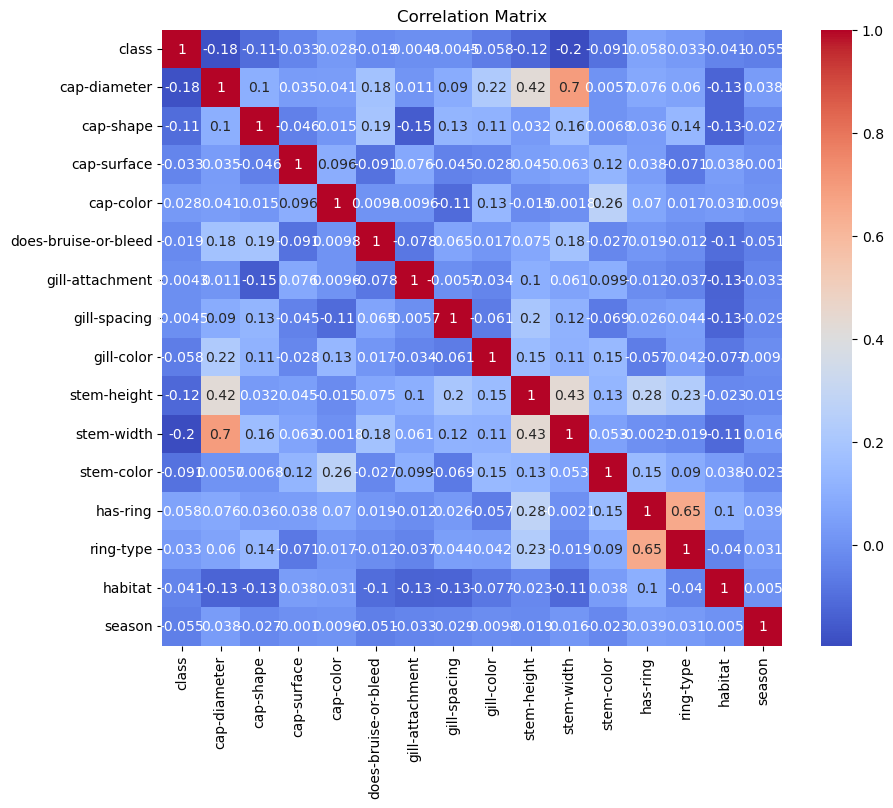

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Edible", "Possinous"])
    plt.yticks([0.5, 1.5], ["Edible", "Possinous"])
    plt.show()


In [21]:
from sklearn.metrics import classification_report
target_names = ["Edible", "Possinus"]

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

      Edible       1.00      0.99      1.00      6733
    Possinus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



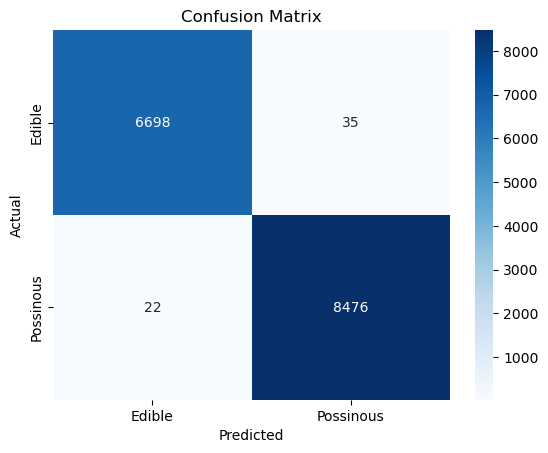

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6733
    Possinus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



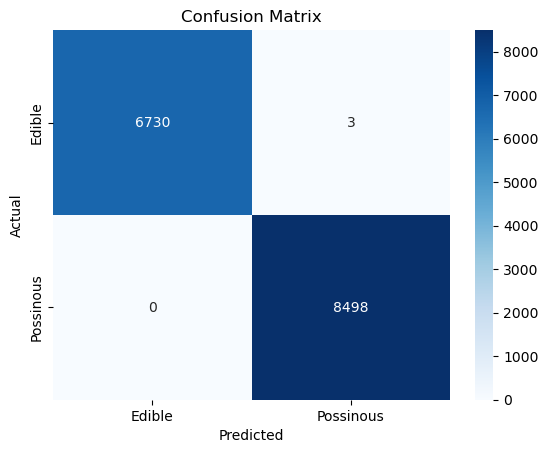

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred)

# Logistic Regresion

In [26]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

      Edible       0.60      0.44      0.51      6733
    Possinus       0.64      0.77      0.70      8498

    accuracy                           0.62     15231
   macro avg       0.62      0.61      0.60     15231
weighted avg       0.62      0.62      0.61     15231



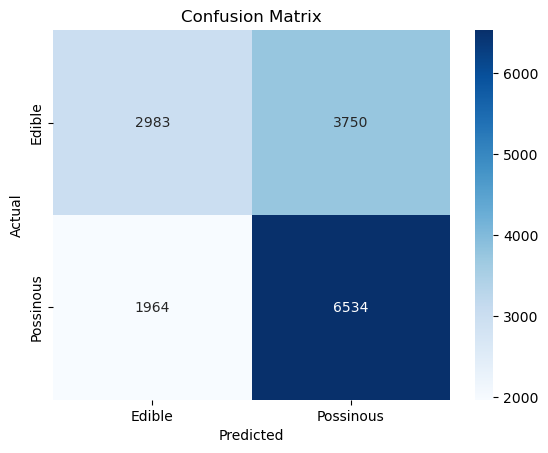

In [27]:
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

      Edible       0.57      0.32      0.41      6733
    Possinus       0.60      0.81      0.69      8498

    accuracy                           0.59     15231
   macro avg       0.58      0.56      0.55     15231
weighted avg       0.59      0.59      0.57     15231



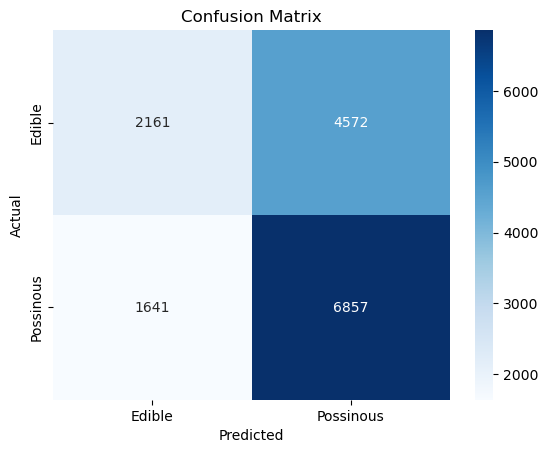

In [29]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred)

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      6733
    Possinus       1.00      1.00      1.00      8498

    accuracy                           1.00     15231
   macro avg       1.00      1.00      1.00     15231
weighted avg       1.00      1.00      1.00     15231



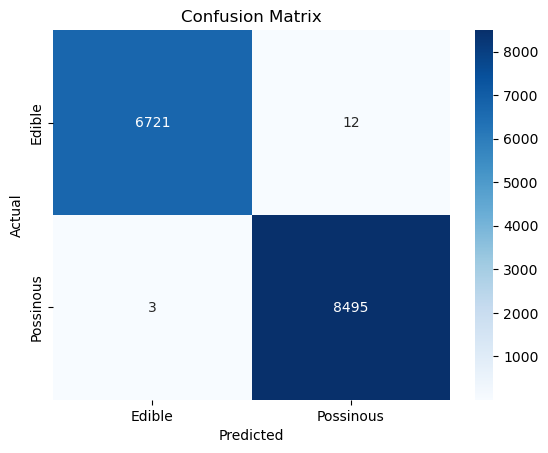

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred)